# Replicating Fortier's THEME System 
Fortier's THEME System was an algorithm based on symbolist theory that allowed literary scholars to identify patterns in synonym usage in works of French fiction. 

## Getting Started

Import all necessary documentation. Choose literary text for use in THEME system. Text must be in .txt format, UTF-8 encoding. Ensure .txt file is located in locatable directory and that your notebook is also in this directory. The user must also download TreeTagger and all associated French parameter files. See here for directions: https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/. TreeTagger was chosen for part of speech tagging because it reliably tags French POS and also provides a lemma for each tagged word. 

## Import Libraries

In [1]:
import os, re #to determine directories and use regex
os.getcwd()
os.chdir("/Users/kaylinland/Documents/RAshipSinclair/Fortier/TreeTagger")#navigate to user directory with TreeTagger files
import nltk
import sys
!sh install-tagger.sh #install TreeTagger
from treetagger import TreeTagger #call TreeTagger
from frenetic import * #Import API for using WOLF French wordnet in Python


mkdir: cmd: File exists
mkdir: lib: File exists
mkdir: bin: File exists
mkdir: doc: File exists

TreeTagger version for Mac OS-X installed.
Tagging scripts installed.
French parameter file installed.
Path variables modified in tagging scripts.

You might want to add /Users/kaylinland/Documents/RAshipSinclair/Fortier/TreeTagger/cmd and /Users/kaylinland/Documents/RAshipSinclair/Fortier/TreeTagger/bin to the PATH variable so that you do not need to specify the full path to run the tagging scripts.



## THEME Function with Manual Synonym List
This function allows the  user to manually input a list of synonyms to use in the THEME function. This function utilizes the Python API for WOLF. Code can be found here: https://github.com/hardik-vala/FreNetic. 

In [2]:
TreeTaggerDirectory = "/Users/kaylinland/Documents/RAshipSinclair/Fortier/TreeTagger/"#User enters directory

def fileinput(filename, keywordList): #function allows user to input .txt file as filename and search list of word keywords
    file = open(filename, "r")
    filestring = file.read()
    
    regTokenizer = nltk.RegexpTokenizer(r'''\w'|\w+|[^\w\s]''')#French tokenizer accounts for liaisons
    tokens1 = regTokenizer.tokenize(filestring.lower())#tokenize all words in .txt file and make lowercase
    tokens2 = [word for word in tokens1 if word[0].isalpha()]#removes all non-alphabetical words like numbers
    
    tt = TreeTagger(TreeTaggerDirectory, language='french')#call TreeTagger
    treetags = tt.tag(tokens2)
    punctag = re.compile("PUN")#create regex object to filter out POS tags that are not needed in THEME system
    senttag = re.compile("SENT")#regex object for sentence tagger
    numtag = re.compile("NUM")#regex object for number tag
    symtag = re.compile("SYM")#regex object for symbol
    treetokens = [x for x in treetags if not (punctag.search(x[1]))
        or senttag.search(x[1] or numtag.search(x[1]) or symtag.search(x[1]))]#remove unneeded POS tags
    
    allconcordances = []
    for kw in keywordList:
        matchset = set()#create set 
        for i, (word, pos, lemma) in enumerate(treetokens): 
            #if lemma == [word for word in keywordList] and word != [word for word in keywordList]:
            if lemma == kw and word != kw:
                matchset.add(word)#create set if lemma from text matches input keyword 
    
        print("\nword matches for ", kw, ": ", matchset)#print results
    
        textObject = nltk.Text(tokens2)#create nltk object for list of tokens
    
        print("\nRunning Primary concordance for ", kw)
        primaryConcordance = textObject.concordance(kw, lines=10)#creates Primary Concordance from text. Primary concordance is all concordances in instances where keyword appears as lemma
        secondaryConcordance = [] #secondaryConcordance creates concordances that include all inflections of inputed keyword
        for lemmamatch in matchset: 
            print("\nRunning Secondary concordances for ", lemmamatch)
            secondaryConcordance.append(textObject.concordance(lemmamatch, lines=10))#Secondary concordance
            textConcordancePositions = nltk.ConcordanceIndex(kw)#add location of keywords in text
        allconcordances.append([kw, primaryConcordance, secondaryConcordance, textConcordancePositions])
    return(allconcordances)#return all concordances

## Synonym Function
This function creates a list of synonyms from a keyword inputted by the user. Researchers could utilize this function as a stand alone to obtain a list of synonyms. 

In [3]:
FreNeticDirectory = "/Users/kaylinland/Documents/RAshipSinclair/Fortier/wolf-1.0b4.xml" #Enter location with WOLF .xml file

def synonyms(keyword): #create list of synonyms using French wordnet from chosen theme keyword
       
    fwn = FreNetic(FreNeticDirectory)
    synset = fwn.synsets(keyword)#create synset object
    #synonymlist = []
    synonyms = set()
    for synx in synset: #get list of all literals for chosen synset
        for sy in synx.literals():
            #synonymlist += (str(sy).split(' ')[0])
            #synonymlist = synonymlist + (str(sy).split(' ')[0])
            #synonymlist.append(str(sy).split(' ')[0])
            synonyms.add(str(sy).split(' ')[0])
    
    return(synonyms)

The secondary synonym function creates a list of synonyms from the first list of synonyms (in other words, expanding the semantic field). 

In [4]:
def secondarySynonyms(keyword): #function produces list of synonyms from primary synonym list

    secondarySynonyms = set()

    for syn in synonyms(keyword): 
        secondarySynonyms= secondarySynonyms|(synonyms(syn)) 
    
    return(sorted(secondarySynonyms, key=str.casefold))

## THEME Function with Integrated Synonym Function
This function integrates the THEME function with the above synonym function, allowing users to input a single keyword and obtain concordances for associated synonyms. Function includes option for cycling through secondary synonym list (synonyms of synonyms) if desired. 

In [13]:
TreeTaggerDirectory = "/Users/kaylinland/Documents/RAshipSinclair/Fortier/TreeTagger/"#User enters directory

def fileinput2(filename, kyw, secondsyn=False): #function allows user to input .txt file as filename and search list of word keywords
    file = open(filename, "r")
    filestring = file.read()
    
    regTokenizer = nltk.RegexpTokenizer(r'''\w'|\w+|[^\w\s]''')#French tokenizer accounts for liaisons
    tokens1 = regTokenizer.tokenize(filestring.lower())#tokenize all words in .txt file and make lowercase
    tokens2 = [word for word in tokens1 if word[0].isalpha()]#removes all non-alphabetical words like numbers
    
    tt = TreeTagger(TreeTaggerDirectory, language='french')#call TreeTagger
    treetags = tt.tag(tokens2)
    punctag = re.compile("PUN")#create regex object to filter out POS tags that are not needed in THEME system
    senttag = re.compile("SENT")#regex object for sentence tagger
    numtag = re.compile("NUM")#regex object for number tag
    symtag = re.compile("SYM")#regex object for symbol
    treetokens = [x for x in treetags if not (punctag.search(x[1]))
        or senttag.search(x[1] or numtag.search(x[1]) or symtag.search(x[1]))]#remove unneeded POS tags
    
    if secondsyn==False: #creates optional parameter to run secondary synonym list
        keywordList = synonyms(kyw)
    else:
        keywordList = secondarySynonyms(kyw)
    
    allconcordances = []
    for kw in keywordList:
        matchset = set()#create set 
        for i, (word, pos, lemma) in enumerate(treetokens): 
            #if lemma == [word for word in keywordList] and word != [word for word in keywordList]:
            if lemma == kw and word != kw:
                matchset.add(word)#create set if lemma from text matches input keyword 
    
        print("\nword matches for ", kw, ": ", matchset)#print results
    
        textObject = nltk.Text(tokens2)#create nltk object for list of tokens
    
        print("\nRunning Primary concordance for ", kw)
        concord = textObject.concordance_list(kw)
        primaryConcordance = [x.line for x in concord]#creates Primary Concordance from text. Primary concordance is all concordances in instances where keyword appears as lemma
        secondaryConcordance = [] #secondaryConcordance creates concordances that include all inflections of inputed keyword
        primaryConcordanceIndex = []
        #primaryConcordanceIndex.append(nltk.ConcordanceIndex(kw))#add location of keywords in text
        primaryConcordanceIndex.append([x.offset for x in concord])
        secondaryConcordanceIndex = []
        for lemmamatch in matchset: 
            print("\nRunning Secondary concordances for ", lemmamatch)
            concord2 = textObject.concordance_list(lemmamatch)
            secondaryConcordance.append([x.line for x in concord2])#Secondary concordance
            secondaryConcordanceIndex.append([x.offset for x in concord2])#add location of synonyms in text
            allconcordances.append([kw, primaryConcordance, primaryConcordanceIndex, secondaryConcordance, secondaryConcordanceIndex])
    return(allconcordances)#return all concordances

Below you will see a test of the THEME Function that includes the synonym function. The chosen text is Gide's l'Immoraliste and the chosen keyword is nuit. 

In [14]:
lImmoraliste = "/Users/kaylinland/Documents/RAshipSinclair/Fortier/SampleDocs/L'Immoraliste.text"
fileinput2(lImmoraliste, 'nuit')


word matches for  soirée :  {'soirées'}

Running Primary concordance for  soirée

Running Secondary concordances for  soirées

word matches for  nuitée :  set()

Running Primary concordance for  nuitée

word matches for  Nox :  set()

Running Primary concordance for  Nox

word matches for  Buongiorno :  set()

Running Primary concordance for  Buongiorno

word matches for  nuit :  {'nuits'}

Running Primary concordance for  nuit

Running Secondary concordances for  nuits

word matches for  soir :  {'soirs'}

Running Primary concordance for  soir

Running Secondary concordances for  soirs

word matches for  sombre :  set()

Running Primary concordance for  sombre

word matches for  noirceur :  set()

Running Primary concordance for  noirceur

word matches for  obscurité :  set()

Running Primary concordance for  obscurité


[['soirée',
  ['s de mon mieux la fin du jour et la soirée à la préparation de mon cours mon t',
   'ménalque quelques jours après cette soirée marceline commença d aller moins bi'],
  [[19532, 25574]],
  [[' car pour moi dès la seconde de ces soirées je ne trouvai plus rien à écouter r']],
  [[24190]]],
 ['nuit',
  ['n de nous trois gravement jusqu à la nuit nous n échangeâmes pas dix paroles u',
   'rusque de la journée quand ce fut la nuit michel dit première partie i mes che',
   'ensée m éveilla plusieurs fois cette nuit plusieurs fois je me dressai sur ma ',
   'x qui me secouait encore plus quelle nuit arrivés à el djem pas d auberge un a',
   'ait le village était endormi dans la nuit qui paraissait immense on entrevoyai',
   'oi c est vrai tu es tout pâle non la nuit le vent reprit sa force enfin la dil',
   'je lui dis j ai craché le sang cette nuit elle n eut pas un cri simplement ell',
   'ts de l hôtel je ne pus dormir cette nuit tant le pressentiment de mes nouvell',
   '

## Visualization
Import the parameters to enable visualization. User must have plot nine downloaded to computer. 

In [19]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

In [20]:
def FreqHisto(themeoutput, plottitle = "", binsize = 500):#second variable allows user to enter plot title and bin size, otherwise user is prompted

    allindices = [] #create empty list for location of all keywords in text by index number
    for x in themeoutput: 
        if len(x[2][0])>=1:#includes index position of all keywords with frequency of at least one
            for y in x[2][0]: 
                allindices.append(y)#add these words to list for position 2
        if len(x[4])>=1: 
            for y in x[4][0]: 
                allindices.append(y)
    testPandas = pd.DataFrame({"location_index": allindices})
    
    if plottitle == "":
        titletext = input("Enter desired title: ")
    else: titletext = str(plottitle)

    visualization = (ggplot(testPandas)
    + aes(x="location_index")
    + geom_histogram(binwidth=int(binsize))#change bin width here
    + labs(title= titletext, x='location index #', y='frequency of synonyms')
    )
    
    return(visualization)

Below you can see the visualization function performed for the text "Isabelle" by Gide for the word nuit. Users must first run the base THEME function using either fileinput1 or fileinput2. The output for this function should be saved as themeoutput (as shown below). 

In [30]:
testPandas = pd.DataFrame({"location_index": allindices})
textfile = "/Users/kaylinland/Documents/RAshipSinclair/Fortier/SampleDocs/Isabelle_Gide.txt"#define file path
themeoutput = fileinput2(textfile, "nuit")


word matches for  soirée :  set()

Running Primary concordance for  soirée

word matches for  nuitée :  set()

Running Primary concordance for  nuitée

word matches for  Nox :  set()

Running Primary concordance for  Nox

word matches for  Buongiorno :  set()

Running Primary concordance for  Buongiorno

word matches for  nuit :  {'nuits'}

Running Primary concordance for  nuit

Running Secondary concordances for  nuits

word matches for  soir :  {'soirs'}

Running Primary concordance for  soir

Running Secondary concordances for  soirs

word matches for  sombre :  {'sombres'}

Running Primary concordance for  sombre

Running Secondary concordances for  sombres

word matches for  noirceur :  set()

Running Primary concordance for  noirceur

word matches for  obscurité :  set()

Running Primary concordance for  obscurité


Enter desired title: Occurrences of 'Nuit' Synonyms in Gide's "Isabelle"


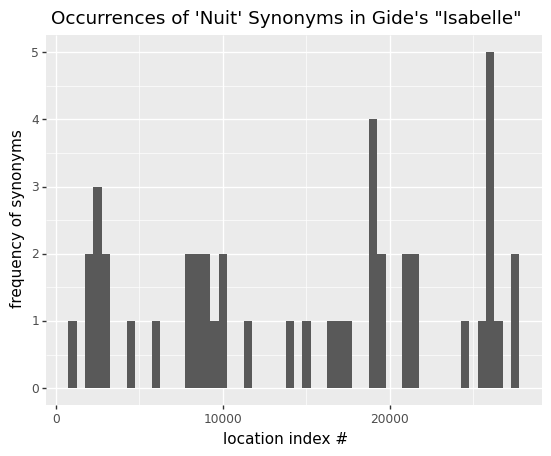

<ggplot: (-9223372036521552689)>

In [32]:
FreqHisto(themeoutput) 